# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux_20Agent/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
#    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#    next_states = env_info.vector_observations         # get next state (for each agent)
#    rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
#    scores += env_info.rewards                         # update the score (for each agent)
#    states = next_states                               # roll over states to next time step
#    if np.any(dones):                                  # exit loop if episode finished
#        break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import random
import time
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque
from model_agent.ddpgAgent import Agent

import logging
logging.basicConfig(level=logging.INFO, format='')

In [8]:
agent = Agent(stateSize = state_size, actionSize = action_size, randomSeed = 2)

def DDPG(agent, numEpisodes = 1000, lastEPNum = 1):
    # load weights into nets   
    maxT         = 1000
    flag         = False # When environment is technically solved
    scores       = [] # list containing scores from each episodes 
    scoresWindow = deque(maxlen=100)
    totalTimeElapsed = 0

    for currentEp in range(lastEPNum, numEpisodes + 1):
        begin    = time.time()
        
        avgScore = 0
        envInfo  = env.reset(train_mode = True)[brain_name]
        states   = envInfo.vector_observations
        scoresT  = np.zeros(num_agents)
        agent.reset()
        score    = 0

        for t in range(maxT):
            actions    = agent.act(states)
            envInfo   = env.step(actions)[brain_name]
            nextStates = envInfo.vector_observations
            rewards    = envInfo.rewards
            dones      = envInfo.local_done
            agent.step(states, actions, rewards, nextStates, dones, t)
            scoresT += rewards
            states  = nextStates

            if np.any(dones):
                print("I got in here")
                print(currentEp)
                break
        
        score = np.mean(scoresT)
        scores.append(score)
        scoresWindow.append(score)
        avgScore = np.mean(scoresWindow)
        
        end = time.time()
        diff = end - begin

        print("\rEpisode {:}\tAverage Score: {:.2f}\tMax Score {:.2f} \t Time {:.2f}s".format(currentEp, avgScore, scoresT.max(), diff), end="")
        totalTimeElapsed += diff

        if(currentEp % 20 == 0):
            print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f} \t Time {:.2f}s".format(currentEp, avgScore, scoresT.max(), totalTimeElapsed))
            torch.save(agent.actorLocal.state_dict(), 'weights/checkpointActor_' + str(currentEp) + '.pth')
            torch.save(agent.criticLocal.state_dict(), 'weights/checkpointCritic_' + str(currentEp) + '.pth')

        if(avgScore >= 30):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\t\tTime Elapsed {:.2f} s'.format(currentEp, avgScore, totalTimeElapsed))
            torch.save(agent.actorLocal.state_dict(), "FINALCheckpointActorSolved.pth")
            torch.save(agent.criticLocal.state_dict(), "FINALCheckpointCriticSolved.pth")
            break
    return scores

scores = DDPG(agent)

Episode 20	 Average Score 0.48	Max Score 1.57 	 Time 789.10s
Episode 40	 Average Score 1.45	Max Score 6.86 	 Time 1535.42s
Episode 60	 Average Score 3.02	Max Score 16.05 	 Time 2492.86s
Episode 80	 Average Score 5.47	Max Score 24.35 	 Time 3449.98s
Episode 100	 Average Score 7.96	Max Score 29.96 	 Time 4441.89s
Episode 120	 Average Score 11.47	Max Score 38.87 	 Time 5433.56s
Episode 140	 Average Score 15.59	Max Score 32.40 	 Time 6431.94s
Episode 160	 Average Score 19.93	Max Score 38.17 	 Time 7428.52s
Episode 180	 Average Score 23.65	Max Score 33.55 	 Time 8432.73s
Episode 200	 Average Score 26.53	Max Score 39.51 	 Time 9415.04s
Episode 220	 Average Score 28.86	Max Score 37.49 	 Time 10397.57s
Episode 240	 Average Score 29.93	Max Score 37.60 	 Time 11355.04s
Episode 243	Average Score: 30.04	Max Score 39.61 	 Time 47.99s
Environment solved in 243 episodes!	Average Score: 30.04		Time Elapsed 11499.42 s


In [9]:
env.close()

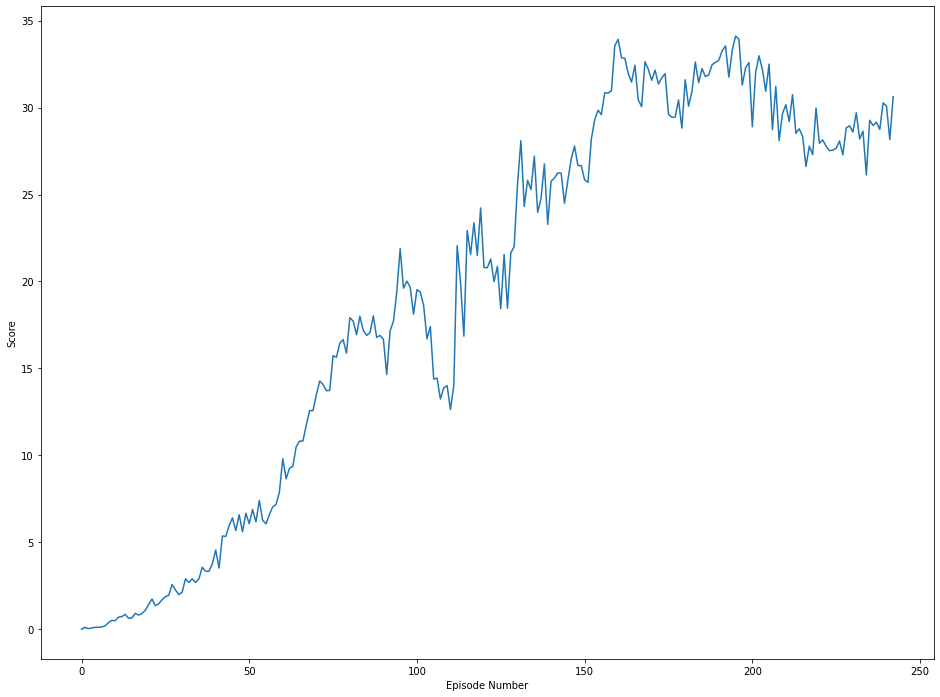

In [11]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel("Episode Number")
plt.ylabel("Score")
plt.show()
fig.savefig("./ReportImages/ResultGraph.png")